In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
results_raw = pd.read_csv('../results/results.csv')
results_raw.head()

,id,measurement_seq_start_time,availability,mut,mdt,mtbf,measurement_start_time,measurement_end_time,fault_profile,cluster_type,measurement_count,load_duration,locust_user_count,locust_spawn_rate,prev_stack_git_commit_short,comment
0,d73e6687-5dde-4630-ac81-cc782cc4182c,04-07-2021_00-04-20.303398,0.135135,18.75,160.0,178.75,04-07-2021_00-04-31.643939,04-07-2021_00-14-41.240349,custom,eks,1,600,1,1,bf5a942,First EKS test
1,c1be61c2-580d-4b2d-8aeb-2446c1bed119,04-07-2021_00-28-40.470254,1.000000,600.00,NaN,NaN,04-07-2021_00-28-48.925095,04-07-2021_00-38-58.831217,network-partition,eks,2,600,1,1,3c228d6,Second EKS test
2,c1be61c2-580d-4b2d-8aeb-2446c1bed119,04-07-2021_00-28-40.470254,0.900000,135.00,20.0,155.00,04-07-2021_00-45-03.390138,04-07-2021_00-55-12.140483,network-partition,eks,2,600,1,1,3c228d6,Second EKS test
3,fb02bd7c-3434-4a65-821f-e527270cee19,04-07-2021_09-40-34.423576,0.475000,57.00,60.0,117.00,04-07-2021_09-40-41.791389,04-07-2021_09-50-48.832709,io,eks,10,600,1,1,caa27f7,First proper IO test
4,fb02bd7c-3434-4a65-821f-e527270cee19,04-07-2021_09-40-34.423576,0.475000,57.00,63.0,117.00,04-07-2021_09-51-56.156181,04-07-2021_10-02-03.017025,io,eks,10,600,1,1,caa27f7,First proper IO test


In [3]:
# results_raw.dtypes

In [4]:
results_avg_by_id = results_raw.groupby(by=['id']).mean()
results_avg_by_id.head()

,availability,mut,mdt,mtbf,measurement_count,load_duration,locust_user_count,locust_spawn_rate
id,,,,,,,,
66151945-dd5d-498d-8cf1-7889b2f5045b,0.942436,236.550000,17.500000,213.666667,10,600,1,1
671d615f-b3d7-4437-9a7f-1d12c0e6b931,0.773397,169.400000,41.111111,163.166667,10,600,1,1
a1bbcd60-c96b-421b-ac9a-0d7a0c30db6c,0.473106,114.305556,182.750000,251.111111,10,600,1,1
abddcd4f-e494-4e72-9883-f78883f76d32,0.951795,307.300000,18.000000,252.125000,10,600,1,1
bc178dca-4bea-43e0-8432-d3facc3eadd2,0.300064,301.500000,inf,inf,10,600,1,1


In [5]:
result_ids_with_other_infos = results_raw.loc[:, ['id', 'fault_profile', 'measurement_seq_start_time', 'cluster_type', 'comment']] \
    .drop_duplicates() \
    .reset_index(drop=True)
result_ids_with_other_infos

,id,fault_profile,measurement_seq_start_time,cluster_type,comment
0,d73e6687-5dde-4630-ac81-cc782cc4182c,custom,04-07-2021_00-04-20.303398,eks,First EKS test
1,c1be61c2-580d-4b2d-8aeb-2446c1bed119,network-partition,04-07-2021_00-28-40.470254,eks,Second EKS test
2,fb02bd7c-3434-4a65-821f-e527270cee19,io,04-07-2021_09-40-34.423576,eks,First proper IO test
3,671d615f-b3d7-4437-9a7f-1d12c0e6b931,network-delay,04-07-2021_13-42-17.181397,eks,First proper network delay test
4,e99aeb09-3f6c-41c6-bcfd-8bb203e5fbc1,pod-failure,04-09-2021_19-31-57.405869,eks,First pod failure test
5,a1bbcd60-c96b-421b-ac9a-0d7a0c30db6c,pod-kill,04-09-2021_22-02-12.724972,eks,First pod kill test
6,66151945-dd5d-498d-8cf1-7889b2f5045b,stress-cpu,04-10-2021_13-46-58.258675,eks,First stress CPU test
7,abddcd4f-e494-4e72-9883-f78883f76d32,stress-mem,04-10-2021_16-12-38.022300,eks,First stress memory test
8,f6331fa5-8d6c-4977-96d7-54cf0e447778,none,04-10-2021_19-09-48.270519,eks,First none profile test
9,bc178dca-4bea-43e0-8432-d3facc3eadd2,network-partition,04-30-2021_18-14-50.598459,eks,Third proper network partition test


In [6]:
results_avg_all_info = pd.merge(results_avg_by_id, result_ids_with_other_infos, on='id')

# filter out measurement sequence with less than 10 measurements
results_avg_all_info = results_avg_all_info[results_avg_all_info['measurement_count'] >= 10]

results_avg_all_info

,id,availability,mut,mdt,mtbf,measurement_count,load_duration,locust_user_count,locust_spawn_rate,fault_profile,measurement_seq_start_time,cluster_type,comment
0,66151945-dd5d-498d-8cf1-7889b2f5045b,0.942436,236.550000,17.500000,213.666667,10,600,1,1,stress-cpu,04-10-2021_13-46-58.258675,eks,First stress CPU test
1,671d615f-b3d7-4437-9a7f-1d12c0e6b931,0.773397,169.400000,41.111111,163.166667,10,600,1,1,network-delay,04-07-2021_13-42-17.181397,eks,First proper network delay test
2,a1bbcd60-c96b-421b-ac9a-0d7a0c30db6c,0.473106,114.305556,182.750000,251.111111,10,600,1,1,pod-kill,04-09-2021_22-02-12.724972,eks,First pod kill test
3,abddcd4f-e494-4e72-9883-f78883f76d32,0.951795,307.300000,18.000000,252.125000,10,600,1,1,stress-mem,04-10-2021_16-12-38.022300,eks,First stress memory test
4,bc178dca-4bea-43e0-8432-d3facc3eadd2,0.300064,301.500000,inf,inf,10,600,1,1,network-partition,04-30-2021_18-14-50.598459,eks,Third proper network partition test
7,e99aeb09-3f6c-41c6-bcfd-8bb203e5fbc1,0.213397,87.812500,272.500000,278.437500,10,600,1,1,pod-failure,04-09-2021_19-31-57.405869,eks,First pod failure test
8,f6331fa5-8d6c-4977-96d7-54cf0e447778,0.962372,384.500000,21.666667,414.722222,10,600,1,1,none,04-10-2021_19-09-48.270519,eks,First none profile test
9,fb02bd7c-3434-4a65-821f-e527270cee19,0.498718,57.750000,57.650000,114.457143,10,600,1,1,io,04-07-2021_09-40-34.423576,eks,First proper IO test


In [7]:
results_avg_fault_profile_idx = results_avg_all_info.set_index(results_avg_all_info.loc[:, 'fault_profile'])
results_avg_fault_profile_idx

,id,availability,mut,mdt,mtbf,measurement_count,load_duration,locust_user_count,locust_spawn_rate,fault_profile,measurement_seq_start_time,cluster_type,comment
fault_profile,,,,,,,,,,,,,
stress-cpu,66151945-dd5d-498d-8cf1-7889b2f5045b,0.942436,236.550000,17.500000,213.666667,10,600,1,1,stress-cpu,04-10-2021_13-46-58.258675,eks,First stress CPU test
network-delay,671d615f-b3d7-4437-9a7f-1d12c0e6b931,0.773397,169.400000,41.111111,163.166667,10,600,1,1,network-delay,04-07-2021_13-42-17.181397,eks,First proper network delay test
pod-kill,a1bbcd60-c96b-421b-ac9a-0d7a0c30db6c,0.473106,114.305556,182.750000,251.111111,10,600,1,1,pod-kill,04-09-2021_22-02-12.724972,eks,First pod kill test
stress-mem,abddcd4f-e494-4e72-9883-f78883f76d32,0.951795,307.300000,18.000000,252.125000,10,600,1,1,stress-mem,04-10-2021_16-12-38.022300,eks,First stress memory test
network-partition,bc178dca-4bea-43e0-8432-d3facc3eadd2,0.300064,301.500000,inf,inf,10,600,1,1,network-partition,04-30-2021_18-14-50.598459,eks,Third proper network partition test
pod-failure,e99aeb09-3f6c-41c6-bcfd-8bb203e5fbc1,0.213397,87.812500,272.500000,278.437500,10,600,1,1,pod-failure,04-09-2021_19-31-57.405869,eks,First pod failure test
none,f6331fa5-8d6c-4977-96d7-54cf0e447778,0.962372,384.500000,21.666667,414.722222,10,600,1,1,none,04-10-2021_19-09-48.270519,eks,First none profile test
io,fb02bd7c-3434-4a65-821f-e527270cee19,0.498718,57.750000,57.650000,114.457143,10,600,1,1,io,04-07-2021_09-40-34.423576,eks,First proper IO test


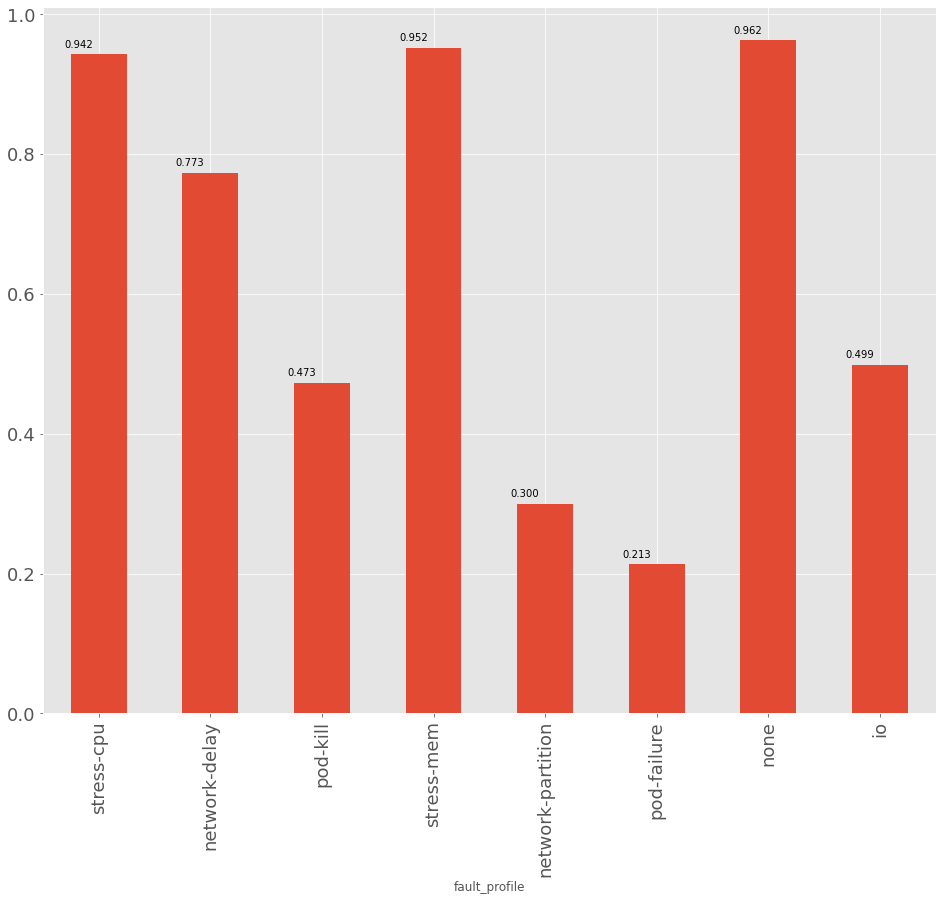

In [13]:
# Availability on average per fault profiles
ax = results_avg_fault_profile_idx.loc[:, 'availability'].plot.bar(figsize=(16, 13), fontsize=18)
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() - 0.06, p.get_height() + 0.01))

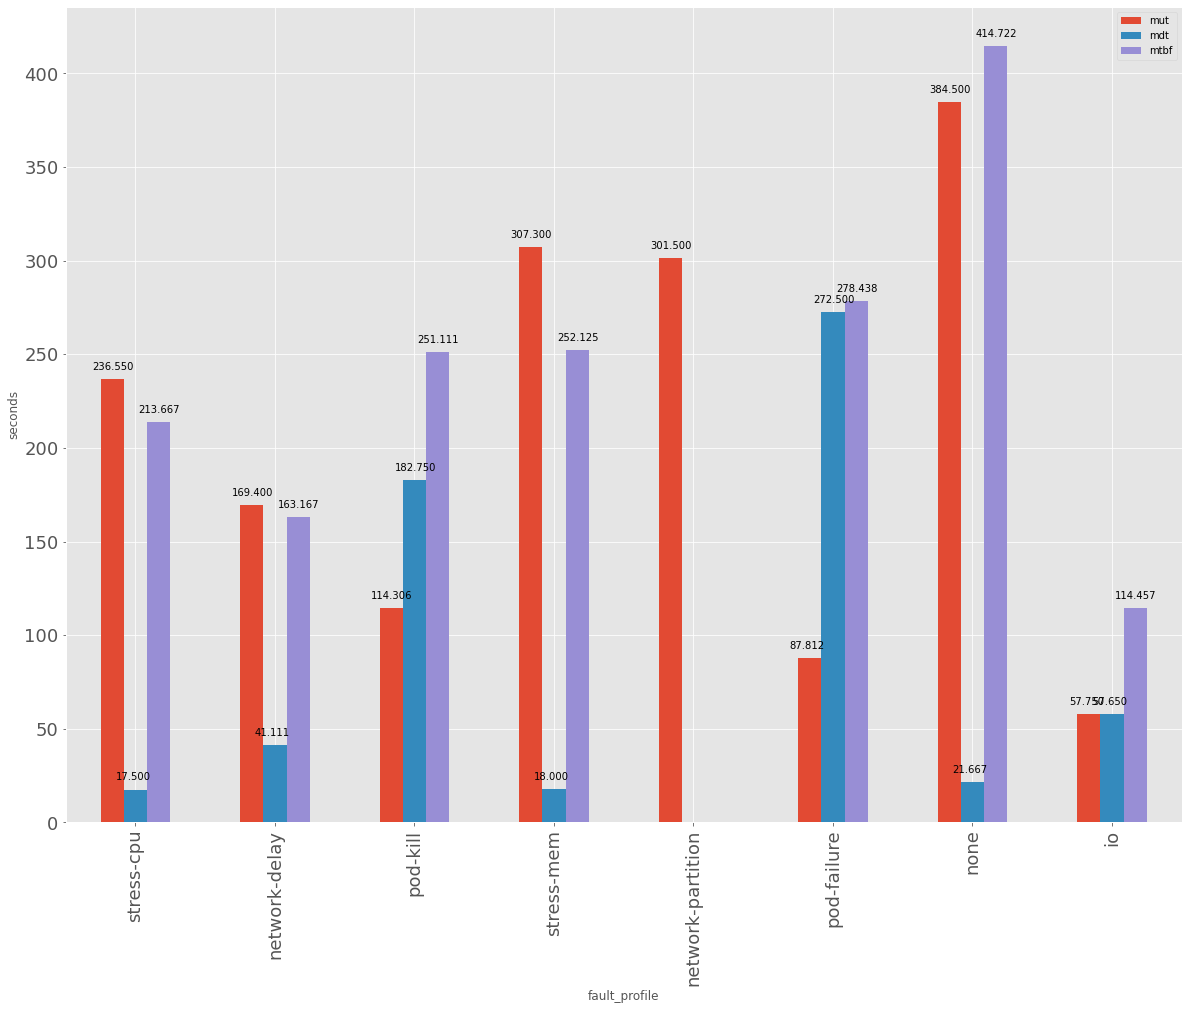

In [14]:
# MUT, MDT, MTBF on average per fault profiles
#  .legend(prop={'size': 50}
ax = results_avg_fault_profile_idx.loc[:, ['mut', 'mdt', 'mtbf']] \
    .plot.bar(figsize=(20, 15), fontsize=18, ylabel="seconds")
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() - 0.06, p.get_height() + 5))

In [10]:
### All measurements where meas count is at least 10
results = results_raw[results_raw['measurement_count'] >= 10].reset_index(drop=True)
results

,id,measurement_seq_start_time,availability,mut,mdt,mtbf,measurement_start_time,measurement_end_time,fault_profile,cluster_type,measurement_count,load_duration,locust_user_count,locust_spawn_rate,prev_stack_git_commit_short,comment
0,fb02bd7c-3434-4a65-821f-e527270cee19,04-07-2021_09-40-34.423576,0.475000,57.0,60.0,117.0,04-07-2021_09-40-41.791389,04-07-2021_09-50-48.832709,io,eks,10,600,1,1,caa27f7,First proper IO test
1,fb02bd7c-3434-4a65-821f-e527270cee19,04-07-2021_09-40-34.423576,0.475000,57.0,63.0,117.0,04-07-2021_09-51-56.156181,04-07-2021_10-02-03.017025,io,eks,10,600,1,1,caa27f7,First proper IO test
2,fb02bd7c-3434-4a65-821f-e527270cee19,04-07-2021_09-40-34.423576,0.475000,57.0,63.0,120.0,04-07-2021_10-03-11.174438,04-07-2021_10-13-17.819658,io,eks,10,600,1,1,caa27f7,First proper IO test
3,fb02bd7c-3434-4a65-821f-e527270cee19,04-07-2021_09-40-34.423576,0.538462,66.0,54.0,120.0,04-07-2021_10-13-59.800418,04-07-2021_10-24-07.455792,io,eks,10,600,1,1,caa27f7,First proper IO test
4,fb02bd7c-3434-4a65-821f-e527270cee19,04-07-2021_09-40-34.423576,0.487179,57.0,60.0,117.0,04-07-2021_10-25-15.592725,04-07-2021_10-35-21.943853,io,eks,10,600,1,1,caa27f7,First proper IO test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,bc178dca-4bea-43e0-8432-d3facc3eadd2,04-30-2021_18-14-50.598459,0.000000,NaN,585.0,NaN,04-30-2021_19-09-07.583199,04-30-2021_19-19-16.869626,network-partition,eks,10,600,1,1,dbbbe50,Third proper network partition test
76,bc178dca-4bea-43e0-8432-d3facc3eadd2,04-30-2021_18-14-50.598459,0.000000,NaN,585.0,NaN,04-30-2021_19-19-57.521221,04-30-2021_19-30-07.341985,network-partition,eks,10,600,1,1,dbbbe50,Third proper network partition test
77,bc178dca-4bea-43e0-8432-d3facc3eadd2,04-30-2021_18-14-50.598459,1.000000,600.0,NaN,NaN,04-30-2021_19-30-15.104009,04-30-2021_19-40-24.305851,network-partition,eks,10,600,1,1,dbbbe50,Third proper network partition test
78,bc178dca-4bea-43e0-8432-d3facc3eadd2,04-30-2021_18-14-50.598459,0.975000,292.5,15.0,307.5,04-30-2021_19-41-21.427405,04-30-2021_19-51-30.610819,network-partition,eks,10,600,1,1,dbbbe50,Third proper network partition test


<AxesSubplot:>

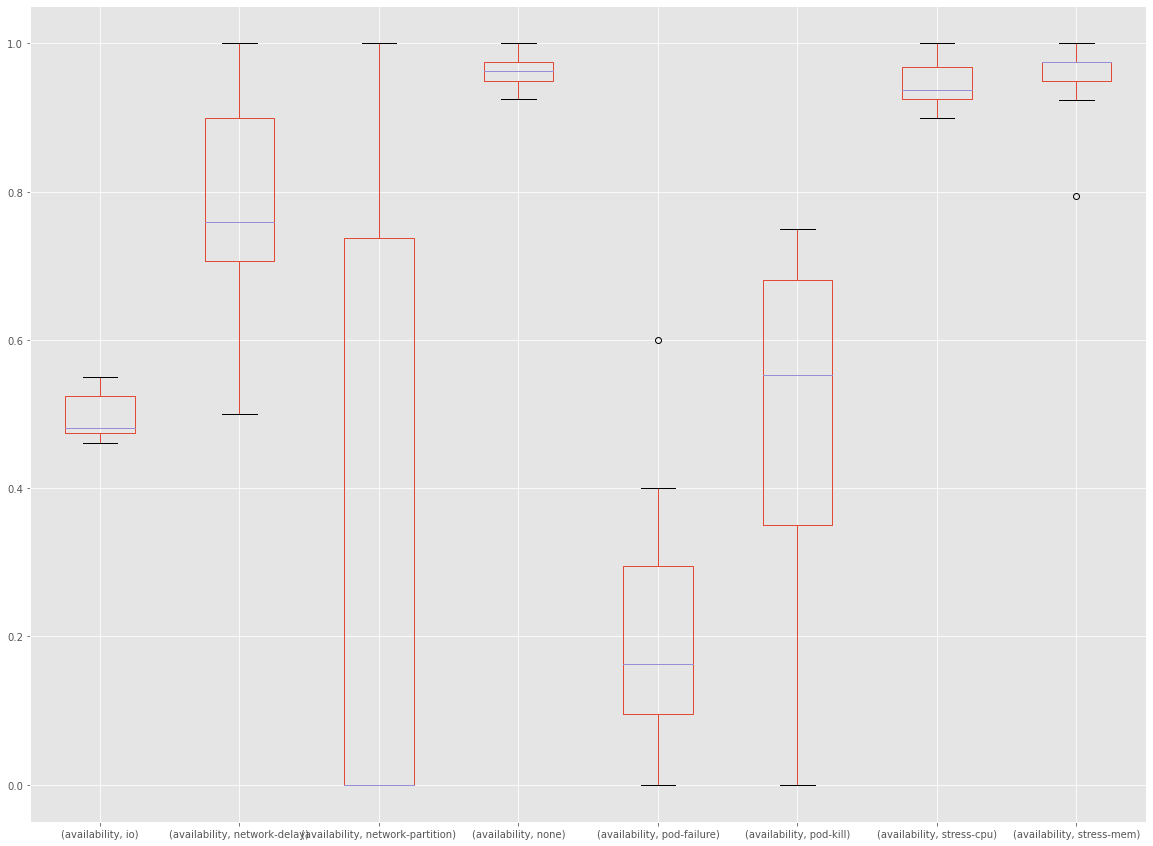

In [11]:
# Availability distribution of all measurements per fault profiles
availability_all = results.loc[:, ['availability', 'fault_profile']]

availability_all.pivot(columns='fault_profile') \
    .plot.box(by='fault_profile', figsize=(20,15), fontsize=10)